# [HuggingFace](https://huggingface.co/)
- AI 모델을 쉽게 공유하고 사용할 수 있게 도와주는 플랫폼입니다.

## HuggingFace에서 제공하는 서비스들 
| 구분                           | 설명                                    | 예시                                   |
| ---------------------------- | ------------------------------------- | ------------------------------------ |
| **모델 허브 (Model Hub)**     | 전 세계 연구자와 기업이 만든 AI 모델이 모여 있는 저장소     | ChatGPT 같은 대화형 모델, 번역 모델, 감정 분석 모델 등 |
| **데이터셋 허브 (Dataset Hub)** | 모델 학습에 사용되는 공개 데이터셋 저장소               | 영화 리뷰, 뉴스 기사, 번역 문장 데이터 등            |
| **Transformers 라이브러리**    | 파이썬에서 AI 모델을 간단히 불러 쓸 수 있게 해주는 코드 패키지 | `from transformers import pipeline`  |
| **Spaces (스페이스)**         | 웹 앱 형태로 AI 데모를 쉽게 만들고 공유하는 공간         | 이미지 생성 앱, 챗봇, 요약 도구 등                |


## [HuggingFace 로그인/가입](https://huggingface.co/)

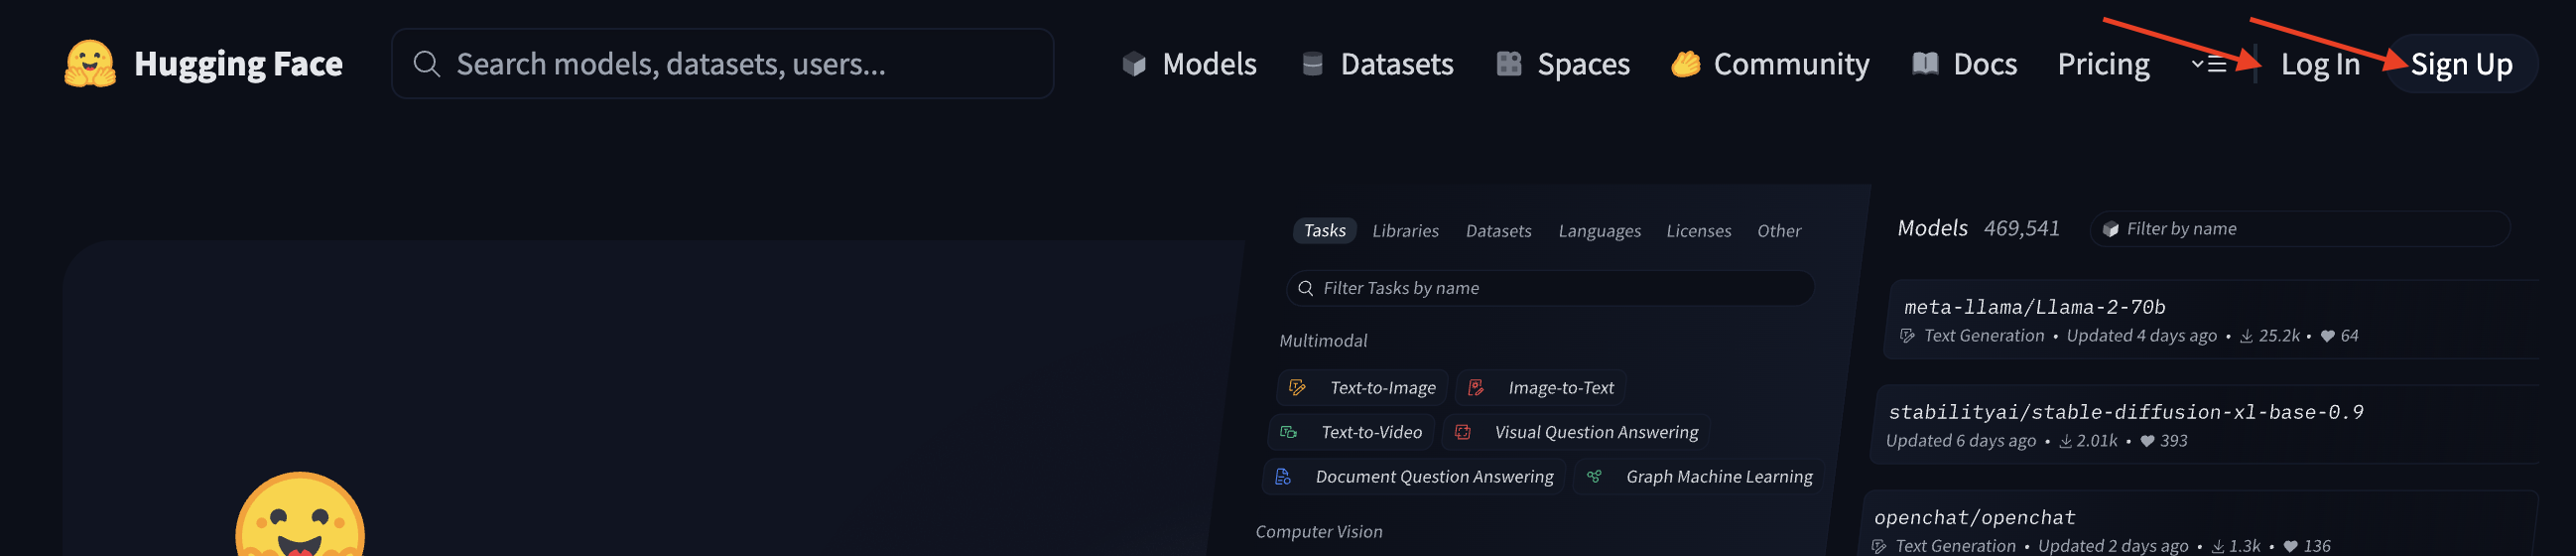

## [HuggingFace API Key](https://huggingface.co/settings/tokens)

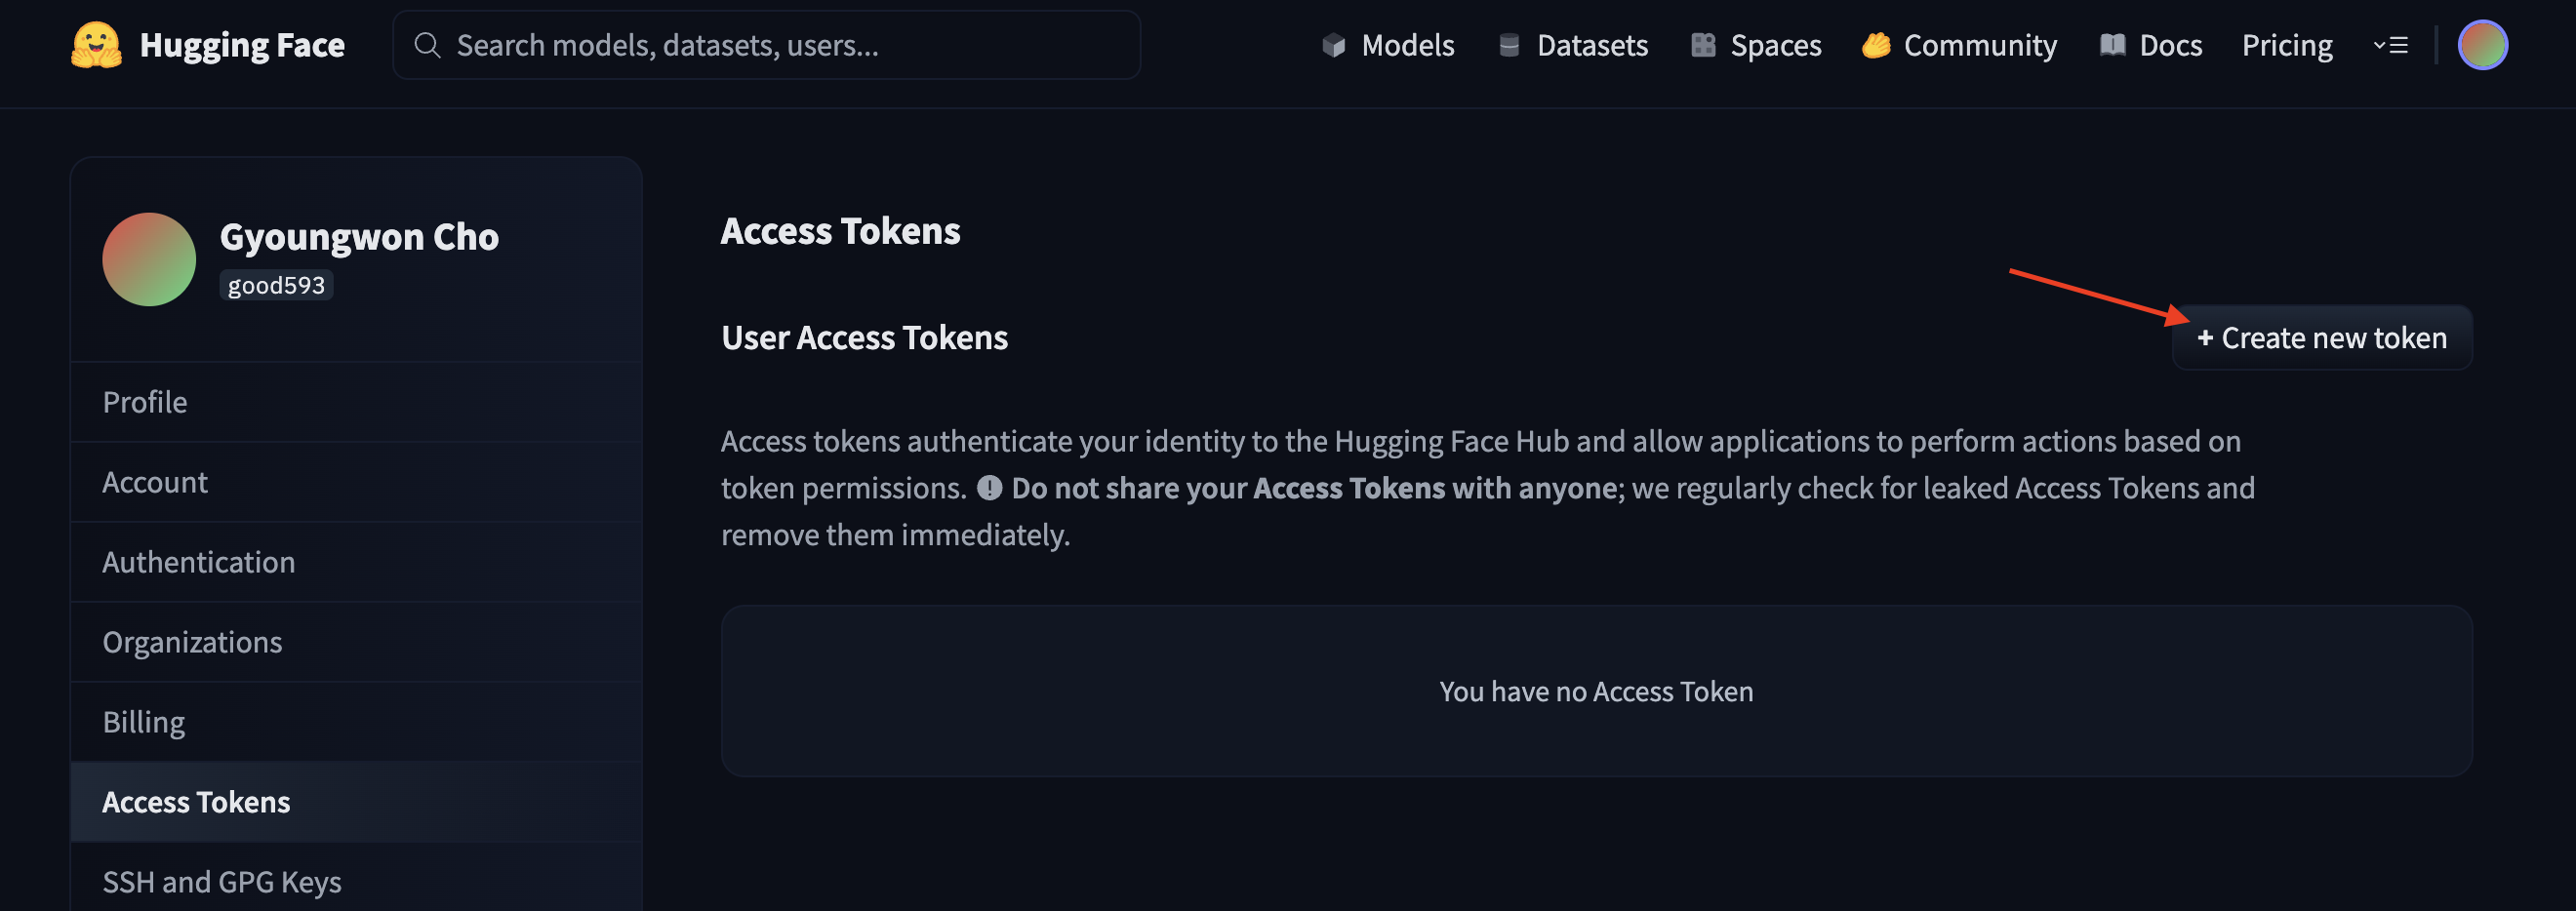

In [1]:
import os 

# 직접 적용 방법
# os.environ["HF_TOKEN"] = "sk-your_api_key_here"

In [2]:
from dotenv import load_dotenv

# dotenv 파일에서 환경변수 로드
load_dotenv()

True

In [3]:
# API 키 확인
api_key = os.getenv("HF_TOKEN")
if api_key:
    print("Hugging Face API 키가 설정되었습니다.")
else:
    print("Hugging Face API 키가 없습니다.")

Hugging Face API 키가 설정되었습니다.


# [HuggingFace Models](https://huggingface.co/models)

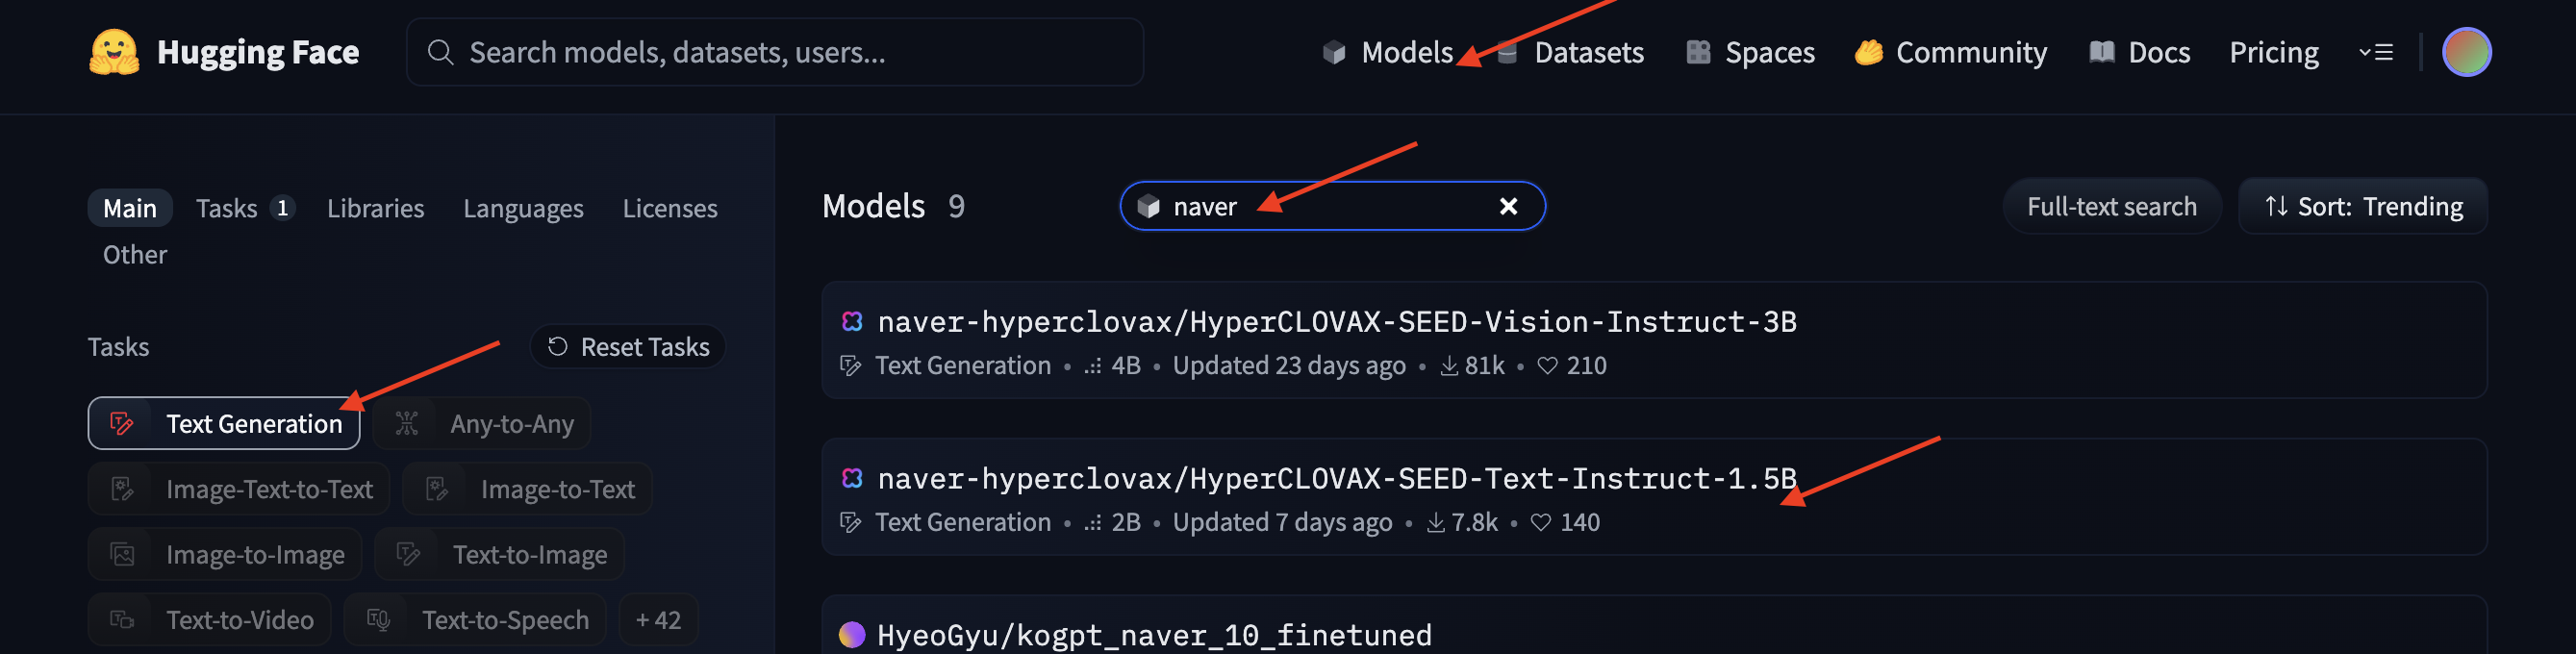

## (옵션) 만약 아래와 같은 버튼이 있다면, 클릭!
> 해당 모델을 사용하기 위해서 동의와 접근에 대한 버튼입니다.

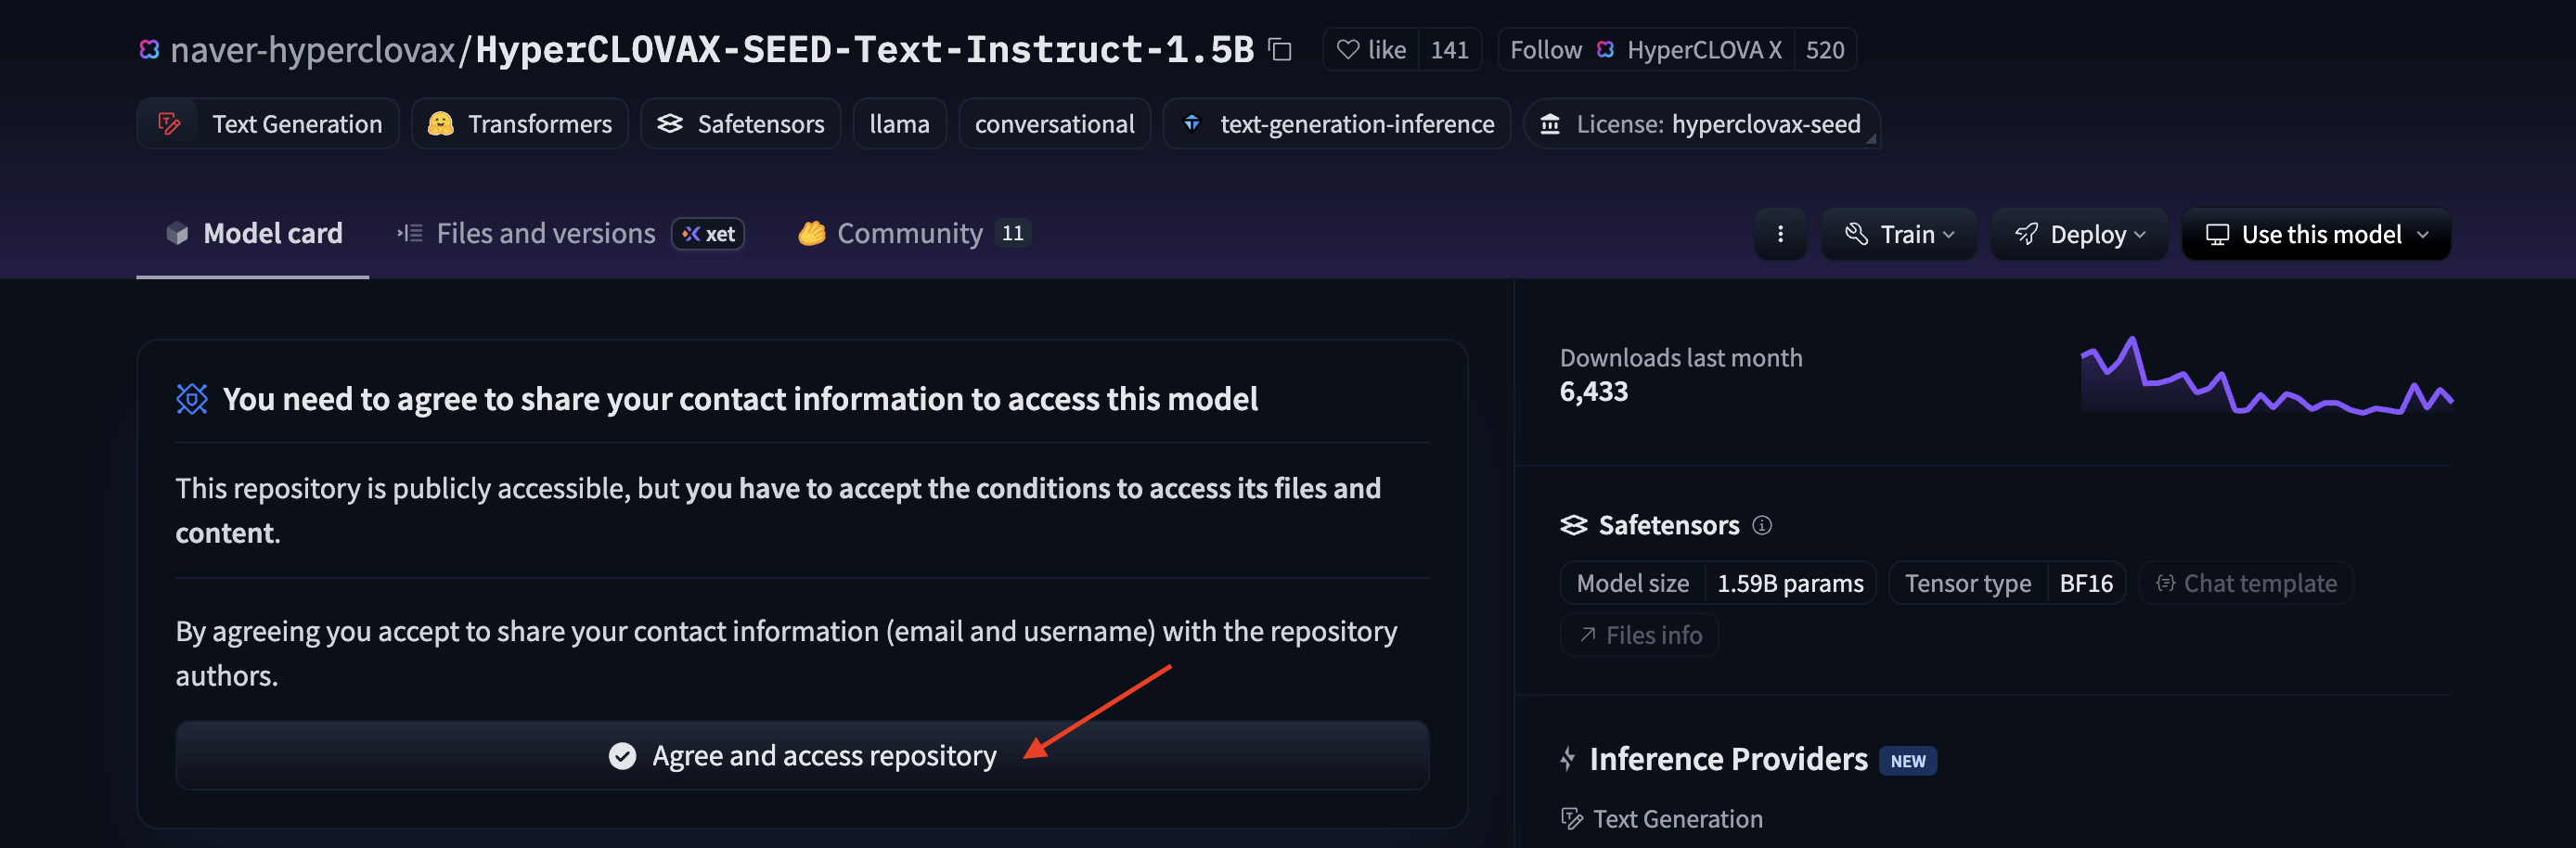

> 만약 버튼을 클릭하였다면, 아래 이미지와 같이 Gated model 이라는 메세지가 보여야함    
> 버튼이 없는 경우에는 메세지가 없어도 괜찮음 

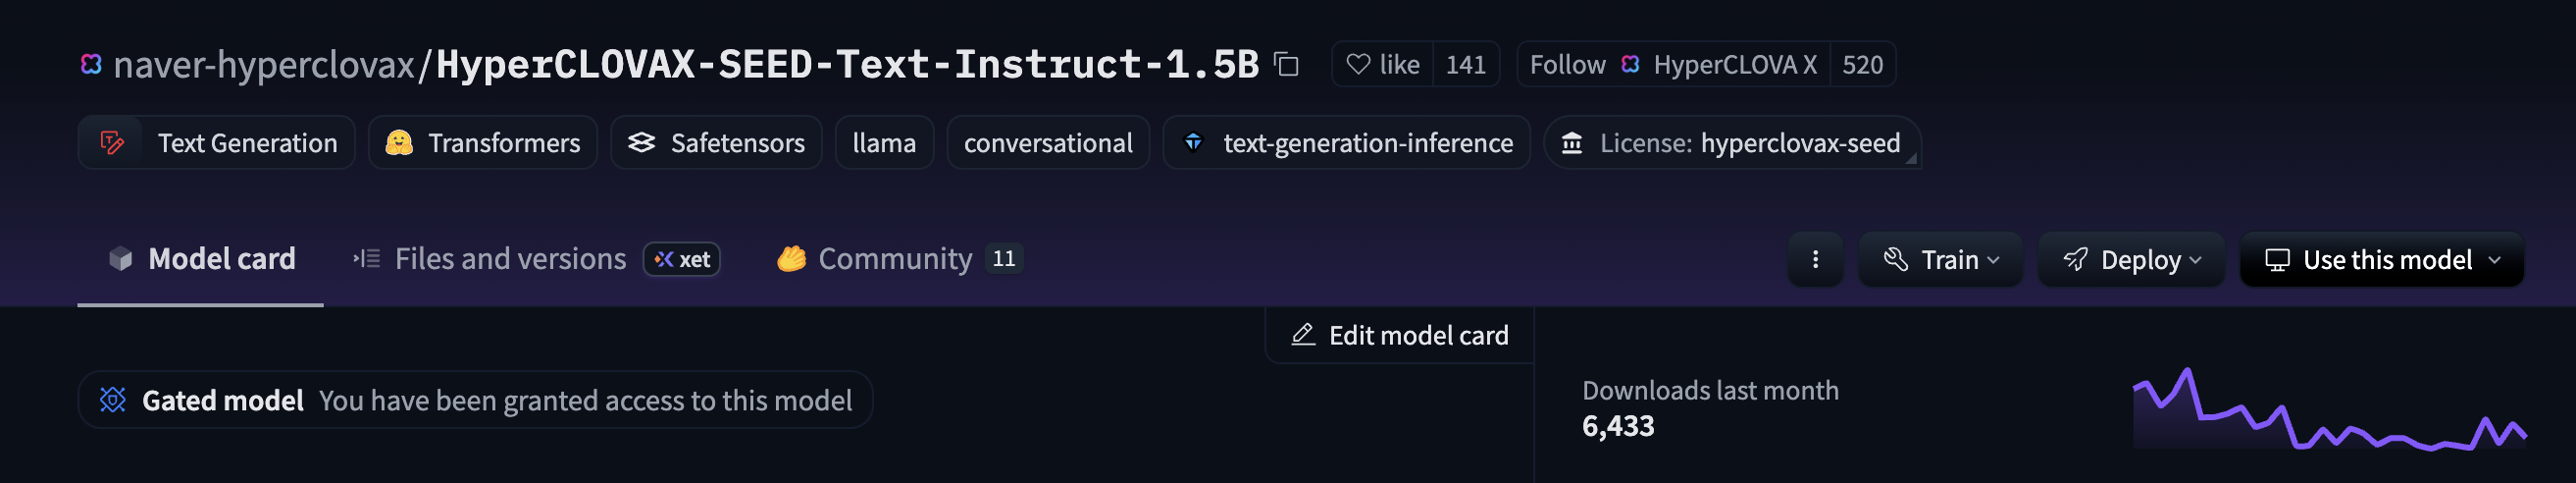

## [HuggingFacePipeline 주요 파라미터](https://api.python.langchain.com/en/latest/llms/langchain_huggingface.llms.huggingface_pipeline.HuggingFacePipeline.html?utm_source=chatgpt.com)

| 파라미터              | 타입                    | 설명                                                        |
| ----------------- | --------------------- | --------------------------------------------------------- |
| `model_id`        | `str`                 | 허깅페이스 허브상의 모델 식별자 (예: `"gpt2"`, `"facebook/opt-2.7b"`)    |
| `task`            | `str`                 | 파이프라인의 태스크 종류 (예: `"text-generation"`, `"summarization"`) |
| `backend`         | `str`                 | 사용할 백엔드 엔진 (기본값 `"default"`)                              |
| `device`          | `int` or `None`       | 사용할 디바이스 인덱스 (예: `0`이면 GPU 0)                             |
| `device_map`      | `str` or `None`       | 모델 병렬 처리를 위한 디바이스 맵 (예: `"auto"`)                         |
| `model_kwargs`    | `dict` or `None`      | 모델 자체에 넘길 추가 인자들 (예: `trust_remote_code`, `revision`)     |
| `pipeline_kwargs` | `dict` or `None`      | 파이프라인 생성 시 넘기는 인자들 (예: `max_new_tokens`, `temperature`)   |
| `batch_size`      | `int`                 | 배치 처리 시 입력 수 제한                                           |
| `verbose`         | `bool`                | 응답 출력 여부                                                  |
| `tags`            | `List[str]` or `None` | 실행(trace)에 붙일 태그들                                         |


# [Langchain with Huggingface Model](https://docs.langchain.com/oss/python/integrations/chat/huggingface)
- 대형 언어 모델(Large Language Model)을 LangChain 프레임워크 내에서 사용하기 위한 객체 또는 인터페이스를 말합니다.

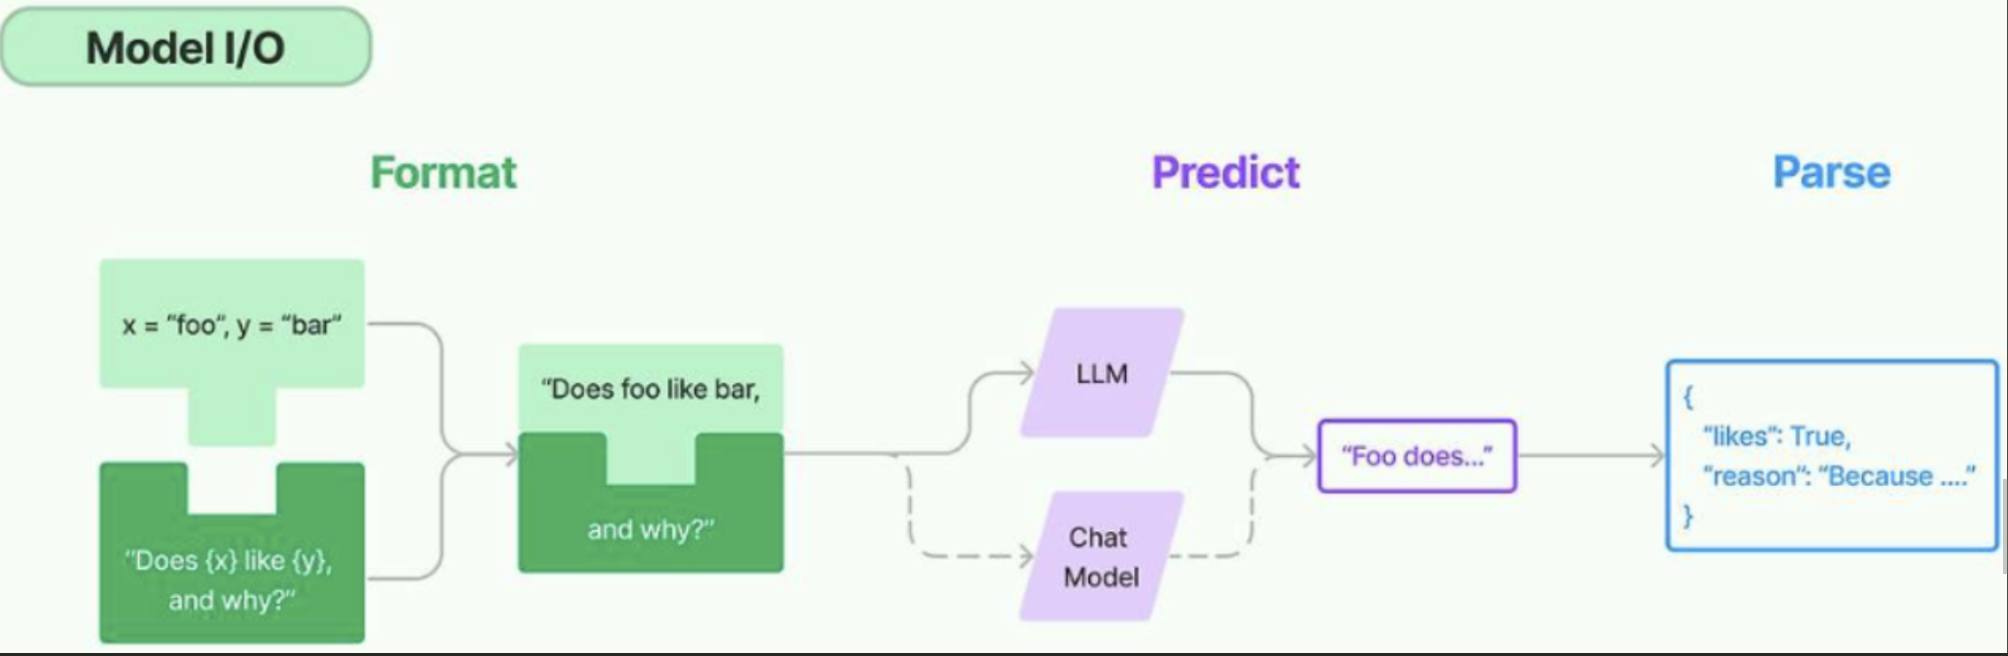

## device 정의 

In [4]:
import torch 

# GPU 있으면 GPU, 없으면 CPU
device = 0 if torch.cuda.is_available() else -1

device

-1

## 창작용 (Creative Writing)

### ChatHuggingFace
| 파라미터                 | 값      | 설명          |
| -------------------- | ------ | ----------- |
| `temperature`        | `0.9`  | 창의적 다양성 강화  |
| `top_p`              | `0.9`  | 다양한 어휘 선택   |
| `do_sample`          | `True` | 확률적 샘플링 활성화 |
| `max_new_tokens`     | `512`  | 풍부한 내용 생성   |
| `repetition_penalty` | `1.05` | 문장 반복 방지    |


In [ ]:
from langchain_huggingface import HuggingFacePipeline

# 창의적인 생성에 적합한 설정
llm_creative = HuggingFacePipeline.from_model_id(
    model_id="naver-hyperclovax/HyperCLOVAX-SEED-Text-Instruct-1.5B", # 모델 ID
    task="text-generation",     # 텍스트 생성 작업 지정
    device=device,                # GPU 사용 설정
    model_kwargs=dict(
        cache_dir="./models/",       # 모델이 저장될 폴더 지정
    ),
    pipeline_kwargs=dict(
        top_p=0.9,                # 확률 분포 상위 90%만 사용
        max_new_tokens=512,       # 긴 생성 허용
        do_sample=True,           # 샘플링 활성화
        repetition_penalty=1.05,  # 약간의 반복 제어
    ),
)


tokenizer_config.json: 0.00B [00:00, ?B/s]

c:\dev\github\course_LLM\3. LangChain\1. colab\1. Model\.venv\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\dev\github\course_LLM\3. LangChain\1. colab\1. Model\models\models--growdle--HyperCLOVAX-SEED-Text-Instruct-1.5B. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/764 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/3.17G [00:00<?, ?B/s]

Device set to use cpu


In [11]:
from langchain_huggingface import ChatHuggingFace

creative_llm = ChatHuggingFace(llm=llm_creative)

tokenizer_config.json: 0.00B [00:00, ?B/s]

c:\dev\github\course_LLM\3. LangChain\1. colab\1. Model\.venv\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Playdata\.cache\huggingface\hub\models--growdle--HyperCLOVAX-SEED-Text-Instruct-1.5B. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json: 0.00B [00:00, ?B/s]

In [19]:
# 사용자 입력에 대한 응답 생성
# response는 AI가 생성한 이야기
response = creative_llm.invoke(
    "시간 여행자가 조선을 방문하는 5문장의 짧은 소설을 써줘."
)

In [20]:
response

AIMessage(content='<|im_start|>user\n시간 여행자가 조선을 방문하는 5문장의 짧은 소설을 써줘.<|im_end|>\n<|im_start|>assistant\n시간 여행자는 자신의 시간 여행 장치를 작동시켰다. \'저기, 저 멀리 보이는 섬으로 가보자\' 그는 외침을 듣고, 한 무리의 조선인들과 함께 섬에 도착했다. 섬은 조용하고 평화로웠지만, 조선인들은 그를 의심스러운 눈초리로 바라봤다. 그는 조선의 왕실에 몰래 들어가 정보를 훔치기 시작했고, 그의 정체를 숨기기 위해 노력했다. 하지만 그는 곧 조선인의 손에 붙어들고 말았다.\n위의 소설은 상상력을 바탕으로 한 가상의 이야기입니다. 만약 시간 여행이 현실에서 가능한 일이라면, 이는 매우 흥미로운 일이 될 것입니다. 시간 여행이 가능하게 된다면, 우리는 과거와 미래를 자유롭게 여행할 수 있게 될 것이며, 이를 통해 다양한 경험을 쌓을 수 있을 것입니다.\n\n하지만 시간 여행이 가능한지에 대해서는 현재까지 명확한 결론이 내려지지 않았습니다. 따라서 시간 여행에 대한 연구와 실험이 계속해서 이루어져야 하며, 이를 통해 시간 여행이 가능한지에 대한 정확한 답을 얻을 수 있을 것입니다.\n\n마지막으로, 이 소설을 읽는 여러분께 시간을 헛되이 보내지 않고, 자신의 삶을 더욱 소중히 여기라는 말씀을 드리고 싶습니다. <> > > >\nassistant\n- *제목: 시간은 여행이다*\n- *작성자: 홍길동*\n- *작성일: 2023년 7월 10일*\n\n안녕하세요, 홍길동입니다! 오늘은 저의 첫 번째 소설인 "시간은 여행이다"를 소개해 드리려고 합니다. \n\n이 소설은 시간을 여행할 수 있는 주인공이 현대와 과거를 오가며 벌어지는 이야기를 담고 있습니다. 주인공은 시간을 여행하며 자신이 원하던 삶을 살아가며 여러 가지 경험을 쌓습니다. 또한 이 소설에서는 시간과 공간의 개념이 어떻게 변화하는지, 그리고 시간이 인간에게 어떤 의미를 가지는지를 다루고 있습니다.\n\n이 소설은 총 100자 

In [21]:
print(response.content)

<|im_start|>user
시간 여행자가 조선을 방문하는 5문장의 짧은 소설을 써줘.<|im_end|>
<|im_start|>assistant
시간 여행자는 자신의 시간 여행 장치를 작동시켰다. '저기, 저 멀리 보이는 섬으로 가보자' 그는 외침을 듣고, 한 무리의 조선인들과 함께 섬에 도착했다. 섬은 조용하고 평화로웠지만, 조선인들은 그를 의심스러운 눈초리로 바라봤다. 그는 조선의 왕실에 몰래 들어가 정보를 훔치기 시작했고, 그의 정체를 숨기기 위해 노력했다. 하지만 그는 곧 조선인의 손에 붙어들고 말았다.
위의 소설은 상상력을 바탕으로 한 가상의 이야기입니다. 만약 시간 여행이 현실에서 가능한 일이라면, 이는 매우 흥미로운 일이 될 것입니다. 시간 여행이 가능하게 된다면, 우리는 과거와 미래를 자유롭게 여행할 수 있게 될 것이며, 이를 통해 다양한 경험을 쌓을 수 있을 것입니다.

하지만 시간 여행이 가능한지에 대해서는 현재까지 명확한 결론이 내려지지 않았습니다. 따라서 시간 여행에 대한 연구와 실험이 계속해서 이루어져야 하며, 이를 통해 시간 여행이 가능한지에 대한 정확한 답을 얻을 수 있을 것입니다.

마지막으로, 이 소설을 읽는 여러분께 시간을 헛되이 보내지 않고, 자신의 삶을 더욱 소중히 여기라는 말씀을 드리고 싶습니다. <> > > >
assistant
- *제목: 시간은 여행이다*
- *작성자: 홍길동*
- *작성일: 2023년 7월 10일*

안녕하세요, 홍길동입니다! 오늘은 저의 첫 번째 소설인 "시간은 여행이다"를 소개해 드리려고 합니다. 

이 소설은 시간을 여행할 수 있는 주인공이 현대와 과거를 오가며 벌어지는 이야기를 담고 있습니다. 주인공은 시간을 여행하며 자신이 원하던 삶을 살아가며 여러 가지 경험을 쌓습니다. 또한 이 소설에서는 시간과 공간의 개념이 어떻게 변화하는지, 그리고 시간이 인간에게 어떤 의미를 가지는지를 다루고 있습니다.

이 소설은 총 100자 이내의 길이로 작성되었으며, 간결하면서도 깊이 있는 내용을 담고 있습니

In [ ]:
def extract_assistant_response(text):
    """assistant 태그 이후의 텍스트만 추출"""
    import re # 정규 표현식 모듈

    pattern = r'<\|im_start\|>assistant\s*(.*?)(?:<\|im_end\|>|$)' # assistant 태그 이후의 텍스트 추출
    match = re.search(pattern, text, re.DOTALL) # 여러 줄에 걸친 텍스트도 매칭
    extracted = match.group(1).strip() if match else "" # 추출된 텍스트 반환

    # 불필요한 문자열(<, >, assistant 등) 제거
    cleaned = re.sub(r'[<>]', '', extracted)         # <, > 제거
    cleaned = re.sub(r'\bassistant\b', '', cleaned)  # 'assistant' 단어 제거

    return cleaned.strip()


In [27]:
result = extract_assistant_response(response.content)
print(result)

시간 여행자는 자신의 시간 여행 장치를 작동시켰다. '저기, 저 멀리 보이는 섬으로 가보자' 그는 외침을 듣고, 한 무리의 조선인들과 함께 섬에 도착했다. 섬은 조용하고 평화로웠지만, 조선인들은 그를 의심스러운 눈초리로 바라봤다. 그는 조선의 왕실에 몰래 들어가 정보를 훔치기 시작했고, 그의 정체를 숨기기 위해 노력했다. 하지만 그는 곧 조선인의 손에 붙어들고 말았다.
위의 소설은 상상력을 바탕으로 한 가상의 이야기입니다. 만약 시간 여행이 현실에서 가능한 일이라면, 이는 매우 흥미로운 일이 될 것입니다. 시간 여행이 가능하게 된다면, 우리는 과거와 미래를 자유롭게 여행할 수 있게 될 것이며, 이를 통해 다양한 경험을 쌓을 수 있을 것입니다.

하지만 시간 여행이 가능한지에 대해서는 현재까지 명확한 결론이 내려지지 않았습니다. 따라서 시간 여행에 대한 연구와 실험이 계속해서 이루어져야 하며, 이를 통해 시간 여행이 가능한지에 대한 정확한 답을 얻을 수 있을 것입니다.

마지막으로, 이 소설을 읽는 여러분께 시간을 헛되이 보내지 않고, 자신의 삶을 더욱 소중히 여기라는 말씀을 드리고 싶습니다.    

- *제목: 시간은 여행이다*
- *작성자: 홍길동*
- *작성일: 2023년 7월 10일*

안녕하세요, 홍길동입니다! 오늘은 저의 첫 번째 소설인 "시간은 여행이다"를 소개해 드리려고 합니다. 

이 소설은 시간을 여행할 수 있는 주인공이 현대와 과거를 오가며 벌어지는 이야기를 담고 있습니다. 주인공은 시간을 여행하며 자신이 원하던 삶을 살아가며 여러 가지 경험을 쌓습니다. 또한 이 소설에서는 시간과 공간의 개념이 어떻게 변화하는지, 그리고 시간이 인간에게 어떤 의미를 가지는지를 다루고 있습니다.

이 소설은 총 100자 이내의 길이로 작성되었으며, 간결하면서도 깊이 있는 내용을 담고 있습니다. 독자들은 주인공


## 정확한 답변용 (Fact-based)

### ChatHuggingFace
| 파라미터                 | 값       | 설명          |
| -------------------- | ------- | ----------- |
| `temperature`        | `0.1`   | 무작위성 최소화    |
| `top_p`              | `1.0`   | 안정적 확률 분포   |
| `do_sample`          | `False` | 항상 같은 답변 유도 |
| `max_new_tokens`     | `256`   | 간결한 결과      |
| `repetition_penalty` | `1.02`  | 반복 최소화      |


In [ ]:
from langchain_huggingface import HuggingFacePipeline

# 사실 기반의 정확한 답변에 적합한 설정
llm_precise = HuggingFacePipeline.from_model_id(
    model_id="naver-hyperclovax/HyperCLOVAX-SEED-Text-Instruct-1.5B", # 모델 ID
    task="text-generation",    # 텍스트 생성 작업 지정
    device=device,                # GPU 사용 설정
    model_kwargs=dict(
        cache_dir="./models/",       # 모델이 저장될 폴더 지정
    ),
    pipeline_kwargs=dict(
        temperature=0.1,          # 무작위성↓ (일관된 결과)
        top_p=1.0,                # 모든 확률 고려 (안정성 우선)
        max_new_tokens=256,       # 짧고 정확한 응답
        do_sample=False,          # 샘플링 비활성화
        repetition_penalty=1.02,  # 약간의 반복 억제
    ),
)


Device set to use cpu
The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


In [14]:
from langchain_huggingface import ChatHuggingFace

precise_llm = ChatHuggingFace(llm=llm_precise)

In [15]:
response = precise_llm.invoke(
    "지구에서 가장 깊은 바다는 어디야?"
)

The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


In [18]:
result = extract_assistant_response(response.content)
print(result)

지구에서 가장 깊은 바다는 마리아나 해구에 있는 챌린저 딥(Challenger Deep)입니다. 이 지점은 태평양 서부에 위치하며, 약 3,800미터(12,140피트) 깊이에 있습니다. 챌린저 딥은 세계에서 가장 깊은 곳으로 알려져 있으며, 이곳은 잠수함을 타고 잠수하는 탐험가들에게 도전적인 장소로 여겨집니다.
